# <b> Modele tarcia - lepkie i stribeck-a


\begin{equation}
    \begin{split}
        & L = \frac{L_pm_p + L_cm_c}{m_r} \\
        & m_r = m_p + m_c \\
        & m_r = m_p + m_c \\
        & M_t = M+m_r \\
        & J_t = J_{cm} + m_rL^2 \\
        & J_{cm} = \frac{4}{3}m_p L_p^2 + m_cL_c^2 -L^2m_r \\
        & J_{cm} = \frac{L_p^2}{m_r} \left[\frac{4}{3} m_r (3m_c + m_p) - (2m_c + m_p)^2 \right]
    \end{split}
\end{equation}

In [8]:
# imports
from IPython.display import display as disp
from sympy import symbols, cos, sin
import sympy as smp
# Newtown notation for derivatives (dot notation)
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting() 

In [2]:
# Symbols
Mt, Jt, mr, L, Lc, g, gamma, D, Ff = smp.symbols('M_t J_t m_r L L_c g gamma D F_f')

# t = smp.symbols('t', real=True)
t = smp.symbols('t')

the, x, u = smp.symbols('theta, x, u', cls=smp.Function)

the = the(t)
x = x(t)
u = u(t)

Dthe = smp.diff(the, t)
DDthe = smp.diff(the, t, 2)
Dx = smp.diff(x, t)
DDx = smp.diff(x, t, 2)

\begin{equation}
    (M + m_r) \ddot{x} + Lm_rcos(\theta)\ddot{\theta} + F_f -Lm_r\sin(\theta)\dot{\theta}^2 
    -u - D\cos(\theta) = 0
\end{equation}

\begin{equation}
    (J_{cm} + m_rL^2)\ddot{\theta} + m_rL\cos(\theta)\ddot{x} + \gamma\dot{\theta} - m_rgL\sin(\theta)
    + L_c D = 0
\end{equation}

    
\begin{equation}
    \begin{bmatrix}
        M_t & m_rL\cos(\theta)\\
        m_rL\cos(\theta) & J_t 
    \end{bmatrix}
    \begin{bmatrix}
        \ddot{x}\\
        \ddot{\theta}
    \end{bmatrix}
    +
    \begin{bmatrix}
        F_f - Lm_r\sin(\theta)\dot{\theta}^2\\
        \gamma\dot{\theta} - m_r g L\sin(\theta)
    \end{bmatrix}
    +
    \begin{bmatrix}
        -u\\
        0
    \end{bmatrix}
    +
    \begin{bmatrix}
        -D\cos(\theta)\\
        -L_c D
    \end{bmatrix}
    =
    0
\end{equation}

In [3]:
# equations
a1 = smp.Matrix([ 
    [Mt, mr*L*cos(the)],
    [mr*L*cos(the), Jt]
])
a2  = smp.Matrix([
    [DDx],
    [DDthe]
])
a3 = smp.Matrix([
    [Ff - L*mr*sin(the)*Dthe**2],
    [gamma*Dthe - mr*g*L*sin(the)]
]) 
a4 = smp.Matrix([
    [-u],
    [0]
])
a5 = smp.Matrix([
    [-D*cos(the)],
    [-Lc*D]
])

# LHS of the model equations, F(...) = 0
F = a1*a2 + a3 + a4 + a5

Stribeck friction model
$$F_{f_{stribeck}} = \left[ \mu_c + (\mu_s - \mu_c) * \exp \left(-\left(\frac{\dot{x}}{v_s}\right) ^ i \right)\right] M_t  g  * sign(\dot{x}) + b \dot{x}$$

In [11]:
# viscous friction
b = smp.symbols('b')
Ff_b = b*Dx

# stribeck friction
uc, us, vs, i = smp.symbols('mu_c mu_s v_s i')
Ff_s = (uc + (us - uc) * smp.exp(-(Dx/vs)**i)) * Mt*g * smp.sign(Dx) + b*Dx

# stribeck friction, sign(Dx) ->np.-> tanh(500*Dx)
uc, us, vs, i = smp.symbols('mu_c mu_s v_s i')
Ff_s2 = (uc + (us - uc) * smp.exp(-(Dx/vs)**i)) * Mt*g * smp.tanh(100*Dx) + b*Dx

In [5]:
disp('Tarcie lepkie')
Ff_b

'Tarcie lepkie'

'Tarcie model Stribeck-a'

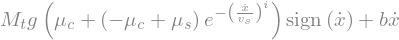

In [10]:
disp('Tarcie model Stribeck-a')
Ff_s

'Tarcie model Stribeck-a bez signum'

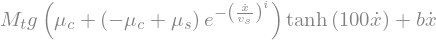

In [7]:
disp('Tarcie model Stribeck-a bez signum')
Ff_s2